In [108]:
# Import necessary libraries
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import itertools
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import manifold
import sklearn.datasets 
from sklearn.preprocessing import normalize

df = pd.read_csv("../songdata.csv")
data1 = df[df['artist'] == 'ABBA']
data2 = df[df['artist'] == 'Lil Wayne']

In [110]:
data1

,Unnamed: 0,artist,song,link,text,Genre1,Genre2
0,0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA...",Pop,Rock
1,1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen...",Pop,Rock
2,2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...,Pop,Rock
3,3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...,Pop,Rock
4,4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...,Pop,Rock
...,...,...,...,...,...,...,...
108,108,ABBA,What About Livingstone,/a/abba/what+about+livingstone_20003055.html,Went to buy me a paper at the local news-stand...,Pop,Rock
109,109,ABBA,When All Is Said And Done,/a/abba/when+all+is+said+done_20003009.html,Here's to us one more toast and then we'll pay...,Pop,Rock
110,110,ABBA,When I Kissed The Teacher,/a/abba/when+i+kissed+the+teacher_20002628.html,Everybody screamed when I kissed the teacher ...,Pop,Rock
111,111,ABBA,Why Did It Have To Be Me?,/a/abba/why+did+it+have+to+be+me_20002575.html,"When you were lonely, you needed a man \r\nSo...",Pop,Rock


In [111]:
data = pd.concat([data1, data2], axis = 0)

tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(data.text)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [112]:
data

,Unnamed: 0,artist,song,link,text,Genre1,Genre2
0,0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA...",Pop,Rock
1,1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen...",Pop,Rock
2,2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...,Pop,Rock
3,3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...,Pop,Rock
4,4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...,Pop,Rock
...,...,...,...,...,...,...,...
41665,41665,Lil Wayne,I Got Some Money On Me,/l/lil+wayne/i+got+some+money+on+me_20982217.html,[Lil Wayne] \r\nI got some money on me \r\nI...,Hip Hop,Electronic
41666,41666,Lil Wayne,I Hate Love,/l/lil+wayne/i+hate+love_20904308.html,She was the sweetest ever \r\nWhatever happen...,Hip Hop,Electronic
41667,41667,Lil Wayne,I Like The View,/l/lil+wayne/i+like+the+view_20980622.html,"I stepped on a flower, foot on the petal \r\n...",Hip Hop,Electronic
41668,41668,Lil Wayne,I Miss My Dawgs,/l/lil+wayne/i+miss+my+dawgs_10165275.html,"Yea, yea, yea, yea \r\nThis is the Carter mot...",Hip Hop,Electronic


In [113]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

In [127]:
X = TruncatedSVD(n_components=50, random_state=0).fit_transform(tf_idf)

In [128]:
#sklearn_pca = PCA(n_components = 2)
#Y_sklearn = sklearn_pca.fit_transform(X)

In [149]:
kmeans = KMeans(n_clusters=10, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(tf_idf_array)
prediction = kmeans.predict(tf_idf_array)

In [150]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

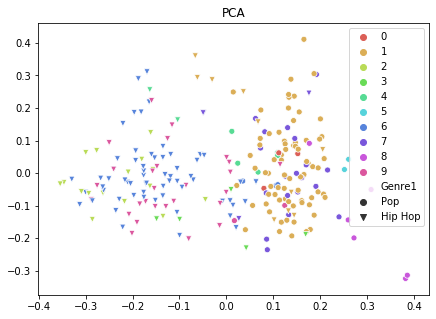

In [151]:
markers = ('o', 'v')
plt.figure(figsize=(7,5))
sns.scatterplot(Y_sklearn[:, 0], Y_sklearn[:, 1],hue=prediction, style=data.Genre1, markers=markers, palette=sns.color_palette("hls", len(np.unique(prediction))))
plt.title('PCA')
plt.savefig('K_Means/PCA_K-Means_Lyrics.png', bbox_inches = "tight")